**Task 2**

In [1]:
Student = {
  "name": "Saifullah",
  "age": "22",
  "Roll_number": "200",
  "Grade": "A",
}
print("Student Information:")
for key, value in Student.items():
    print(f"{key}:{value}")
Student["Grade"] = "B-"
print("\nUpdated Student Information:", Student["Grade"])
Student["Email"]="saifullahkhan@gmail.com"
print("\nAdded email in Student Information:", Student["Email"])
del Student["Roll_number"]
print("\n", Student)

Student Information:
name:Saifullah
age:22
Roll_number:200
Grade:A

Updated Student Information: B-

Added email in Student Information: saifullahkhan@gmail.com

 {'name': 'Saifullah', 'age': '22', 'Grade': 'B-', 'Email': 'saifullahkhan@gmail.com'}


**Task 3**

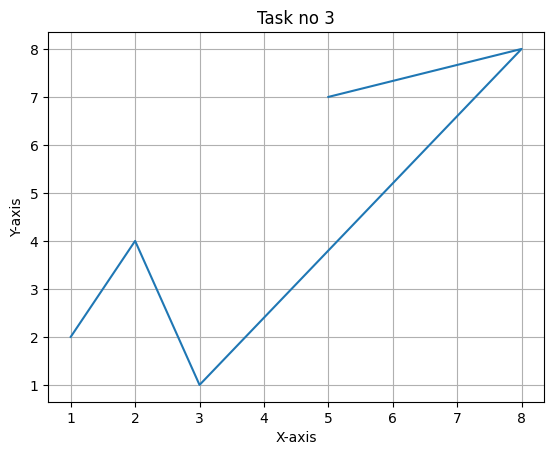

In [2]:
import matplotlib.pyplot as plt
import numpy as np
xpoints = [1,2,3,8,5]
ypoints = [2,4,1,8,7]
plt.plot(xpoints, ypoints)
plt.title("Task no 3")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

**Task 4**

In [3]:
from collections import deque
import time
import tracemalloc
def is_goal(state, target):
    return target in state
def get_next_state(state, jug1_capacity, jug2_capacity):
    x, y = state
    states = set()
    states.add((jug1_capacity, y))
    states.add((x, jug2_capacity))
    states.add((0, y))
    states.add((x, 0))
    pour = min(x, jug2_capacity - y)
    states.add((x - pour, y + pour))
    pour = min(y, jug1_capacity - x)
    states.add((x + pour, y - pour))
    return states
def bfs(jug1_capacity, jug2_capacity, target):
    start = (0, 0)
    visited = set()
    queue = deque([(start, [start])])
    while queue:
        (x, y), path = queue.popleft()
        if is_goal((x, y), target):
            return path
        for next_state in get_next_state((x, y), jug1_capacity, jug2_capacity):
            if next_state not in visited:
                visited.add(next_state)
                queue.append((next_state, path + [next_state]))
def dfs(jug1_capacity, jug2_capacity, target):
    start = (0, 0)
    visited = set()
    stack = [(start, [start])]
    while stack:
        (x, y), path = stack.pop()
        if is_goal((x, y), target):
            return path
        if (x, y) not in visited:
            visited.add((x, y))
            for next_state in get_next_state((x, y), jug1_capacity, jug2_capacity):
                stack.append((next_state, path + [next_state]))
    return None
def compare_alogrihm():
    jug1_capacity = 4
    jug2_capacity = 3
    target = 2
    tracemalloc.start()
    start_time = time.time()
    bfs_path = bfs(jug1_capacity, jug2_capacity, target)
    bfs_time = time.time() - start_time
    bfs_memory = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    tracemalloc.start()
    start_time = time.time()
    dfs_path = dfs(jug1_capacity, jug2_capacity, target)
    dfs_time = time.time() - start_time
    dfs_memory = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    print("BFS Path:", bfs_path)
    print("BFS Time: {:.6f} seconds".format(bfs_time))
    print("BFS Memory: {} bytes".format(bfs_memory))
    print("DFS Path:", dfs_path)
    print("DFS Time: {:.6f} seconds".format(dfs_time))
    print("DFS Memory: {} bytes".format(dfs_memory))
tracemalloc.start()
start_time = time.time()
jug1_capacity = 4
jug2_capacity = 3
target = 2
dfs_path = dfs(jug1_capacity, jug2_capacity, target)
dfs_time = time.time() - start_time
dfs_memory = tracemalloc.get_traced_memory()[1]
tracemalloc.stop()
print("DFS Path:", dfs_path)
print("DFS Time: {:.6f} seconds".format(dfs_time))
print("DFS Memory: {} bytes".format(dfs_memory))
compare_alogrihm()

DFS Path: [(0, 0), (0, 3), (4, 3), (4, 0), (1, 3), (1, 0), (0, 1), (4, 1), (2, 3)]
DFS Time: 0.001349 seconds
DFS Memory: 22075 bytes
BFS Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
BFS Time: 0.000135 seconds
BFS Memory: 2416 bytes
DFS Path: [(0, 0), (0, 3), (4, 3), (4, 0), (1, 3), (1, 0), (0, 1), (4, 1), (2, 3)]
DFS Time: 0.000175 seconds
DFS Memory: 2752 bytes


**Task 5**

In [6]:
import heapq

def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar_search(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    visited = set()

    while open_set:
        _, cost, current, path = heapq.heappop(open_set)

        if current == goal:
            return path  # Path found

        if current in visited:
            continue
        visited.add(current)

        x, y = current

        # Explore neighbors (up, down, left, right)
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            nx, ny = x + dx, y + dy
            # Check bounds and walls
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != 1:
                new_cost = cost + 1
                new_path = path + [(nx, ny)]
                heapq.heappush(open_set, (new_cost + heuristic((nx, ny), goal), new_cost, (nx, ny), new_path))
    return None  # No path found



maze = [
    [0,0,0,0,0,0],
    [0,0,1,0,1,0],
    [0,0,0,10,0,0],
    [0,0,1,10,0,0],
    [0,0,0,0,0,0],
    [1,1,0,1,0,0]
]

start = (0, 0)
goal = (5, 5)

path = astar_search(maze, start, goal)

print("A* Path from A to Y:")
print(path)
print("\nSteps Taken:", len(path) - 1 if path else "No Path Found")


A* Path from A to Y:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]

Steps Taken: 10
